In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/wafic/Downloads/data/my_say/QAID.csv')

In [3]:
data.head()

,user_id,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
0,89,29239,0,0,29264,29258,29284,29253,29278,29276,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,29239,0,0,29268,29259,29284,29252,29278,29275,...,28937,0,0,0,0,0,0,0,0,0
3,183,29239,0,0,29268,29257,29285,29255,29278,29275,...,0,0,0,0,0,0,0,0,0,0
4,10109,29239,0,0,29268,29259,29281,29252,29278,29273,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns.unique()

Index(['user_id', 'q_9423', 'q_9328', 'q_9326', 'q_9431', 'q_9429', 'q_9435',
       'q_9428', 'q_9434', 'q_9433',
       ...
       'q_9327', 'q_9492', 'q_9486', 'q_9496', 'q_9620', 'q_9586', 'q_9474',
       'q_9477', 'q_9476', 'q_9448'],
      dtype='object', length=255)

In [5]:
# data.columns = data.columns.str.replace("q_", "").copy()

In [31]:
df_q = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Answers.csv')

In [8]:
# df_q.head()

In [60]:
# df_q = df_q[(df_q.category_id == 1) | (df_q.category_id == 2) | (df_q.category_id == 3)].copy()

In [9]:
# df_q.question_id.unique()

In [10]:
# data = data[['21494', '21528', '21529', '21537', '21544', '21545', '21546', '21554', '21570',\
#              '21572', '21598', '21599', '21600', '21601', '21602', '21608', '21632', '21647',\
#              '21649', '21650', '21652', '21653', '21710']].copy()

In [11]:
df = data.copy()

In [12]:
df.set_index('user_id', inplace=True)

In [15]:
for col in df.columns:
    df[col] = df[col].astype('category')

In [16]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes

In [17]:
for n, c in df.items():
    numericalize(df, c, n)

In [18]:
df.head()

,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,q_9432,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
user_id,,,,,,,,,,,,,,,,,,,,,
89,3,0,0,1,2,4,2,2,4,2,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,3,0,0,5,3,4,1,2,3,1,...,2,0,0,0,0,0,0,0,0,0
183,3,0,0,5,1,5,4,2,3,1,...,0,0,0,0,0,0,0,0,0,0
10109,3,0,0,5,3,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


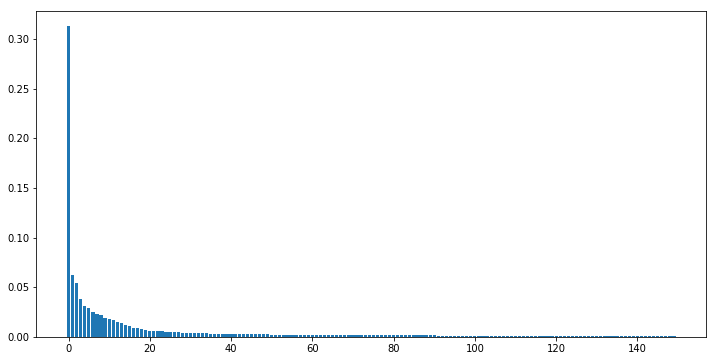

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
pca_fit = pca.fit(df)

p_comp =np.arange(len(pca_fit.explained_variance_ratio_))
var = pca_fit.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.bar(p_comp, var)
plt.show()

In [23]:
pca_fit.explained_variance_ratio_[:25].sum()

0.7634455867162898

In [24]:
# Perform PCA with 85 components
pca = PCA(n_components=25)
df_pca = pca.fit_transform(df)

In [26]:
df_pca.shape

(4513, 25)

In [27]:
def PC_W(df, n_comp):
    return pd.DataFrame(pca.components_[n_comp],index=df.columns, columns=['PC-'+str(n_comp+1)]).\
sort_values('PC-'+str(n_comp+1),ascending=False)

In [29]:
PC_W(df, 0).head()

,PC-1
q_9431,0.221215
q_9401,0.129786
q_9417,0.124339
q_9414,0.122030
q_9482,0.121956


In [30]:
PC_W(df, 0).tail()

,PC-1
q_9448,0.000340
q_9217,-0.002239
q_9216,-0.002938
q_9328,-0.007698
q_9326,-0.014035


In [37]:
df_q[df_q.question_id == 9482]

,question_id,title,start_age,end_age,sex_id,category_id,nb_targets,nb_points,created_at,updated_at,topic_id,prefered_lang,rank,Total_Number_of_Answers,answer_id,description,Number_Of_Answers


In [38]:
df_cat = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Categories.csv')

In [41]:
df_cat[df_cat.question_id == 9401]

,question_id,category_id
239,9401,3.0
